# Python and remote sensing
This notebook is based on ch.6 Python and Remote Sensing of the book "Learning Geospatial Analysis with Python, 2nd Edition" by Joel Lawhead.

In [3]:
from osgeo import gdal_array   
import numpy as np
from osgeo import gdal, osr, ogr
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib as mpl

## Swapping image bands

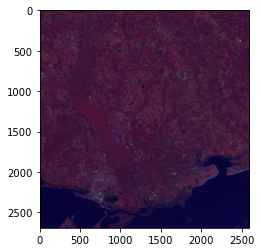

In [4]:
input_fn = 'data/raster/Lawhead/ch6/FalseColor/FalseColor.tif'
input_tiff_img = Image.open(input_fn)
plt.imshow(input_tiff_img)

The colors in the image don't look natural. We want to swap the bands of the raster file to see how it will look like.

In [5]:
img_array = gdal_array.LoadFile(input_fn)
img_array.shape

(3, 2693, 2592)

In [7]:
output_fn ='data/raster/Lawhead/ch6/FalseColor/swap_bands.tif'
output = gdal_array.SaveArray(img_array[[1, 0, 2], :], output_fn, format="GTiff", prototype=input_fn)
output = None

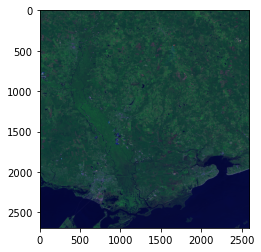

In [8]:
output_tiff_img = Image.open(output_fn)
plt.imshow(output_tiff_img)

The colors now look natural.

## Creating histograms

In [32]:
def dip_histogram(band):
    # Computes the histogram of an image (single band)
    rows, cols = band.shape
    h = np.zeros(256, dtype=int)
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            v = band[row, col]
            h[v] = h[v] + 1
    return h

In [21]:
hist_band1 = dip_histogram(img_array[0])
hist_band2 = dip_histogram(img_array[1])
hist_band3 = dip_histogram(img_array[2])

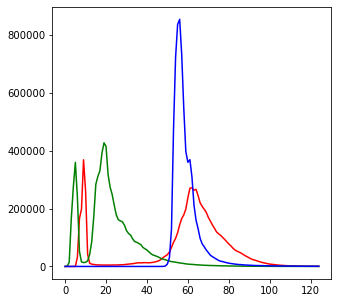

In [31]:
max_value = 125
x =np.arange(0, max_value, 1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
plt.plot(x, hist_band1[:max_value], color='red')
plt.plot(x, hist_band2[:max_value], color='green')
plt.plot(x, hist_band3[:max_value], color='blue')